## Task 1: Introduction

Welcome to **Sentiment Analysis with Keras and TensorFlow**.

![Sentiment Analysis](images/basic_sentiment_analysis.png)


## Task 2: The IMDB Reviews Dataset
____
Note: If you are starting the notebook from this task, you can run cells from all previous tasks in the kernel by going to the top menu and then selecting **Kernel > Restart and Run All**
____

In [1]:
from tensorflow.python.keras.datasets import imdb
import tensorflow as tf
(xtrain,ytrain),(xtest,ytest) = imdb.load_data(num_words=1000)

In [2]:
print(xtrain[0])

[1, 14, 22, 16, 43, 530, 973, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 2, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [3]:
print(ytrain[0])

1


In [5]:
class_name=['Negative','Positive']

In [6]:
word_index = imdb.get_word_index()
print(word_index['hello'])

4822


## Task 3: Decoding the Reviews
___
Note: If you are starting the notebook from this task, you can run cells from all previous tasks in the kernel by going to the top menu and then selecting **Kernel > Restart and Run All**
___


In [7]:
rev_word = dict((value,key) for key, value in word_index.items())
def decode(review):
    text=''
    for i in review:
        text = text+rev_word[i]
        text+=' '
    return text

In [8]:
print(decode(xtrain[0]))

the as you with out themselves powerful and and their becomes and had and of lot from anyone to have after out atmosphere never more room and it so heart shows to years of every never going and help moments or of every and and movie except her was several of enough more with is now and film as you of and and unfortunately of you than him that with out themselves her get for was and of you movie sometimes movie that with scary but and to story wonderful that in seeing in character to of and and with heart had and they of here that with her serious to have does when from why what have and they is you that isn't one will very to as itself with other and in of seen over and for anyone of and br and to whether from than out themselves history he name half some br of and and was two most of mean for 1 any an and she he should is thought and but of script you not while history he heart to real at and but when from one bit then have two of script their with her and most that with wasn't to wit

In [9]:
def show_len():
    print("Length of 1st Training Example :", len(xtrain[0]))
    print("Length of 2nd Training Example :", len(xtrain[1]))
    print("Length of 1st Training Example :", len(xtest[0]))
    print("Length of 2nd Training Example :", len(xtest[1]))
show_len()

Length of 1st Training Example : 218
Length of 2nd Training Example : 189
Length of 1st Training Example : 68
Length of 2nd Training Example : 260



## Task 4: Padding the Examples
___
Note: If you are starting the notebook from this task, you can run cells from all previous tasks in the kernel by going to the top menu and then selecting **Kernel > Restart and Run All**
___


In [10]:
word_index['the']

1

In [13]:
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
xtrain = pad_sequences(xtrain,value=word_index['the'],padding='post' , maxlen=256)
xtest = pad_sequences(xtest,value=word_index['the'],padding='post' , maxlen=256)

In [14]:
show_len()

Length of 1st Training Example : 256
Length of 2nd Training Example : 256
Length of 1st Training Example : 256
Length of 2nd Training Example : 256


In [15]:
decode(xtrain[0])

"the as you with out themselves powerful and and their becomes and had and of lot from anyone to have after out atmosphere never more room and it so heart shows to years of every never going and help moments or of every and and movie except her was several of enough more with is now and film as you of and and unfortunately of you than him that with out themselves her get for was and of you movie sometimes movie that with scary but and to story wonderful that in seeing in character to of and and with heart had and they of here that with her serious to have does when from why what have and they is you that isn't one will very to as itself with other and in of seen over and for anyone of and br and to whether from than out themselves history he name half some br of and and was two most of mean for 1 any an and she he should is thought and but of script you not while history he heart to real at and but when from one bit then have two of script their with her and most that with wasn't to wi

## Task 5: Word Embeddings
___
Note: If you are starting the notebook from this task, you can run cells from all previous tasks in the kernel by going to the top menu and then selecting **Kernel > Restart and Run All**
___
Word Embeddings:

![Word Embeddings](images/word_embeddings.png)

Feature Vectors:

![Learned Embeddings](images/embeddings.png)


## Task 6: Creating and Training the Model
___
Note: If you are starting the notebook from this task, you can run cells from all previous tasks in the kernel by going to the top menu and then selecting **Kernel > Restart and Run All**
___

In [24]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Embedding , GlobalAveragePooling1D
model = Sequential([
    Embedding(10000, 16),
    GlobalAveragePooling1D(),
    Dense(16, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])
model.compile(
    loss='binary_crossentropy',
optimizer = 'adam',
metrics = ['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d_2 ( (None, 16)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [25]:
from tensorflow.python.keras.callbacks import LambdaCallback
simple_log = LambdaCallback(on_epoch_end=lambda e, l:print(e,end='.'))
E = 20
h = model.fit(
xtrain,ytrain,
validation_split=0.2,
epochs=E,
callbacks=[simple_log],
    verbose=False
)


0.1.2.3.4.5.6.7.8.9.10.11.12.13.14.15.16.17.18.19.

## Task 7: Predictions and Evaluation
___
Note: If you are starting the notebook from this task, you can run cells from all previous tasks in the kernel by going to the top menu and then selecting **Kernel > Restart and Run All**
___


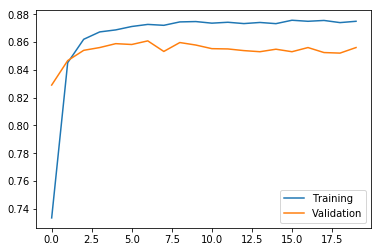

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(range(E), h.history['acc'],label='Training')
plt.plot(range(E),h.history['val_acc'],label='Validation')
plt.legend()
plt.show()


In [28]:
loss,acc=model.evaluate(xtest,ytest)
print('Accuracy ',acc*100)

25000/25000 [==============================] - 1s 51us/step 
Accuracy  85.736


In [33]:
import numpy as np
p =  model.predict(np.expand_dims(xtest[0],axis=0))
print(class_name[np.argmax(p[0])])

Negative


In [ ]:
decode()